In [1]:
"""
@Josh Boquiren
Ver. IV
OTIS Lab MUSC
10.6.2022

README: 
//Program for PVT Chrimson GC project//
*Code loops through folders and files to assemble a dataframe
*Calculates various statistics and the baseline information (including stim location)
*Plots and saves data as a .pdf

Required folder format:
-> Conditions
    -> Mouse
        -> FOV
            -> NPY files

"""

'\n@Josh Boquiren\nVer. IV\nOTIS Lab MUSC\n10.6.2022\n\nREADME: \nPVT Chrimson GC project. Data folders MUST be organized properly!\n\nProper folder format:\n-> Conditions\n    -> Mouse\n        -> FOV\n            -> NPY files\n\nNotes:\n- plot heat map\n\n'

In [5]:
"Import libraries"

import os #functions on the system
import numpy as np #functions on arrays
import pandas as pd #functions on DataFrames
import matplotlib as plt #plot functions
import seaborn as sns #more plot functions
from scipy import stats


In [6]:
"Main"

parent_dir = r"C:\Users\jboqu\Dropbox\2P Imaging Projects\Jackie\Josh\Projects\PvtChrimson-AstroGC\Data"
output_dir = r"C:\Users\jboqu\Dropbox\2P Imaging Projects\Jackie\Josh\Projects\PvtChrimson-AstroGC\Output"
baseline_s = int(input("Enter starting frame value for baseline: "))
baseline_e = int(input("Enter ending frame value for baseline: "))

CONDITIONS = [] #list for all conditions; turn into dataframe later
LABELS = [] #list of condition names
SEM = [] #list of standard error
for condition in os.listdir(parent_dir):
    condition_data = [] #temporary storage for individual condition data
    for mouse in os.listdir(os.path.join(parent_dir, condition)):
        for fov in os.listdir(os.path.join(parent_dir, condition, mouse)):
            for file in os.listdir(os.path.join(parent_dir, condition, mouse, fov)):
                infile = np.load(os.path.join(parent_dir, condition, mouse, fov, file))
                infile = np.squeeze(infile)
                for cell in infile:
                    condition_data.append(cell) #go through files and add each individual cell set of data to a list for df
    data = pd.DataFrame(condition_data) #df for each conditions
    mean = data.mean(axis=0) #calculates the mean of the df
    baseline = mean[baseline_s:baseline_e].mean() #calculates the average mean for baseline
    sem = stats.sem(data) #calculates the standard error
    stim = np.where(mean>2.5) #saves large intensity values from high light exposure //NOT X-VALUES
    CONDITIONS.append(mean[mean<2.5]-baseline) #subtracts the baseline and appends the condition mean data to list excluding large intensity values
    LABELS.append(condition) #appends condition name to list for labels
    SEM.append(sem) #appends sem to list
if len(CONDITIONS) == 2:
    tval, pval = stats.ttest_ind(a=CONDITIONS[0], b=CONDITIONS[1], equal_var=True) #calculates the t-value and p-value
CONDITIONS = pd.DataFrame(CONDITIONS).transpose() #turns list into iterable dataframe

In [7]:
"""Statistics"""

alpha = float(input("Select a significant value: "))
if pval < alpha:
    print("P-Value: ", pval, " is LESS than alpha: ", alpha, "\n")
else:
    print("P-Value: ", pval, " is GREATER than alpha: ", alpha, "\n")
print("Description:\n", CONDITIONS.describe())


P-Value:  5.442240921616335e-103  is LESS than alpha:  0.05 

Description:
                  0            1
count  2250.000000  2241.000000
mean      0.035605     0.022256
std       0.023902     0.015682
min      -0.072166    -0.043272
25%       0.020012     0.012884
50%       0.039118     0.023296
75%       0.053602     0.033306
max       0.087835     0.065223


Plot lines together or separate? (Press 'T' or 't' for together, press any other key for separate)'t'


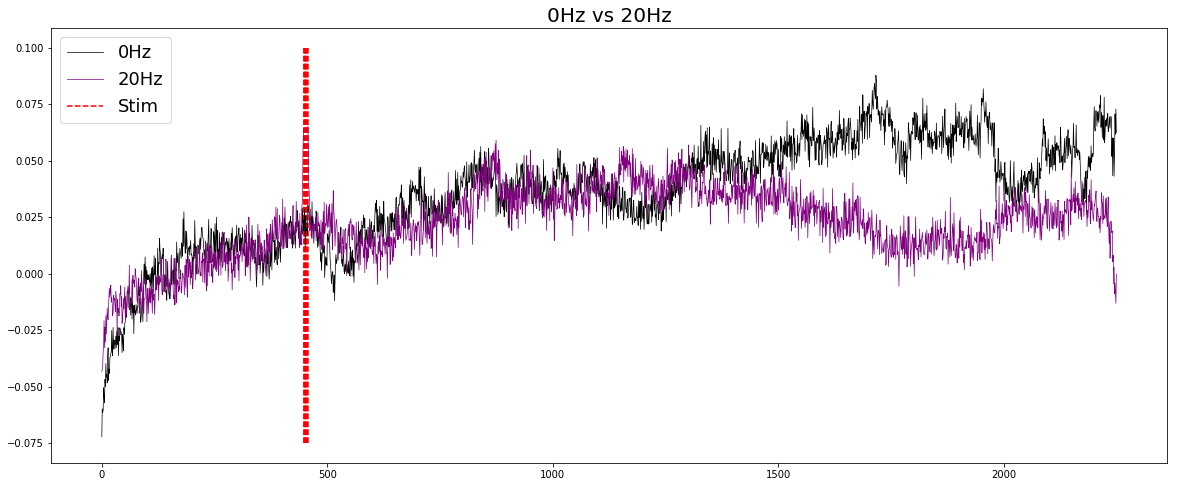

In [3]:
"""Plots"""

option = input("Plot lines together or separate? (Press 'T' or 't' for together, press any other key for separate)")

if option == 'T' or option == 't':
    plt.figure(figsize=(20,8))
    plt.vlines(x=stim, color='r', linestyles='dashed', ymin=-.075, ymax=.1, label="Stim")
    for condition in CONDITIONS:
        plot = CONDITIONS[condition]
        sem = SEM[condition]
        label = LABELS[condition]
        if LABELS[condition] == '0Hz':
            x = np.arange(len(plot))
            # plt.fill_between(x, plot-sem, plot+sem, color='black', alpha=.35, linewidth=.05)
            plt.plot(plot, label=LABELS[condition], color='black', linewidth=.7)
        else:
            # plt.fill_between(x, plot-sem, plot+sem, color='violet', alpha=.6, linewidth=.05)
            plt.plot(plot, label=label, color='purple', linewidth=.7)
    plt.legend(prop={'size':18})
    plt.title('0Hz vs 20Hz', size=20)
    plt.savefig(os.path.join(output_dir,'2023-01-17 PVT Terminal Stim.PDF'), format='PDF')
    plt.show()
else:
    for condition in CONDITIONS:
        plot = CONDITIONS[condition]
        sem = SEM[condition]
        label = LABELS[condition]
        if LABELS[condition] == '0Hz':
            plt.figure(figsize=(20,8))
            plt.vlines(x=stim, color='r', linestyles='dashed', ymin=-.075, ymax=.1, label="Stim")
            x = np.arange(len(plot))
            # plt.fill_between(x, plot-sem, plot+sem, color='black', alpha=.35, linewidth=.05)
            plt.plot(plot, label=LABELS[condition], color='black', linewidth=.7)
            plt.legend(prop={'size':18})
            plt.title('0Hz vs 20Hz', size=20)
            plt.savefig(os.path.join(output_dir,'2023-01-17 PVT Terminal Stim.PDF'), format='PDF')
            plt.show()
        else:
            plt.figure(figsize=(20,8))
            plt.vlines(x=stim, color='r', linestyles='dashed', ymin=-.075, ymax=.1, label="Stim")
            x = np.arange(len(plot))
            # plt.fill_between(x, plot-sem, plot+sem, color='violet', alpha=.6, linewidth=.05)
            plt.plot(plot, label=label, color='purple', linewidth=.7)
            plt.legend(prop={'size':18})
            plt.title('0Hz vs 20Hz', size=20)
            plt.savefig(os.path.join(output_dir,'2023-01-17 PVT Terminal Stim.PDF'), format='PDF')
            plt.show()


